# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [290]:
df = pd.read_csv("marketing_campaign.csv")

In [292]:
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


In [296]:
df.describe()

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,3246.662198,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,8427.750000,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,11191.000000,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


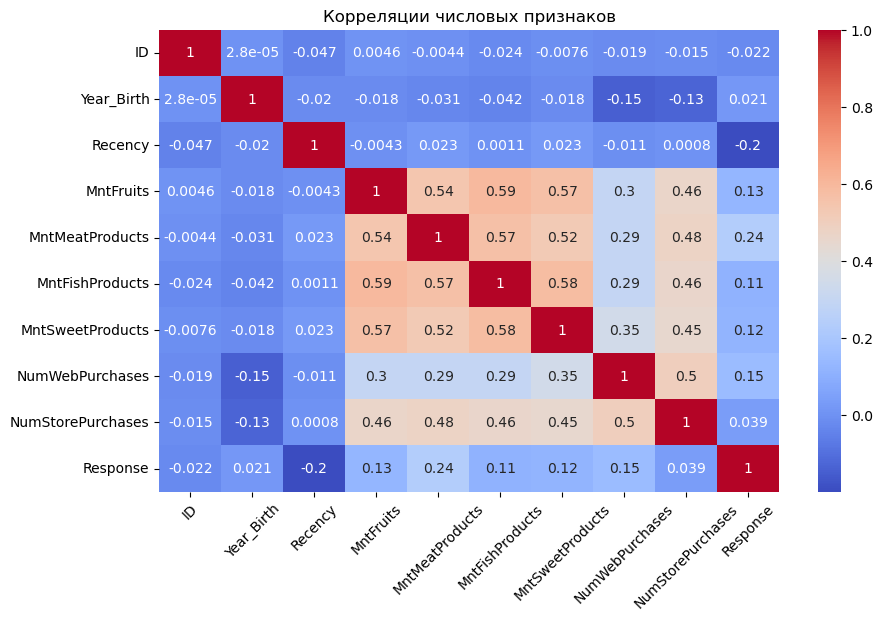

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

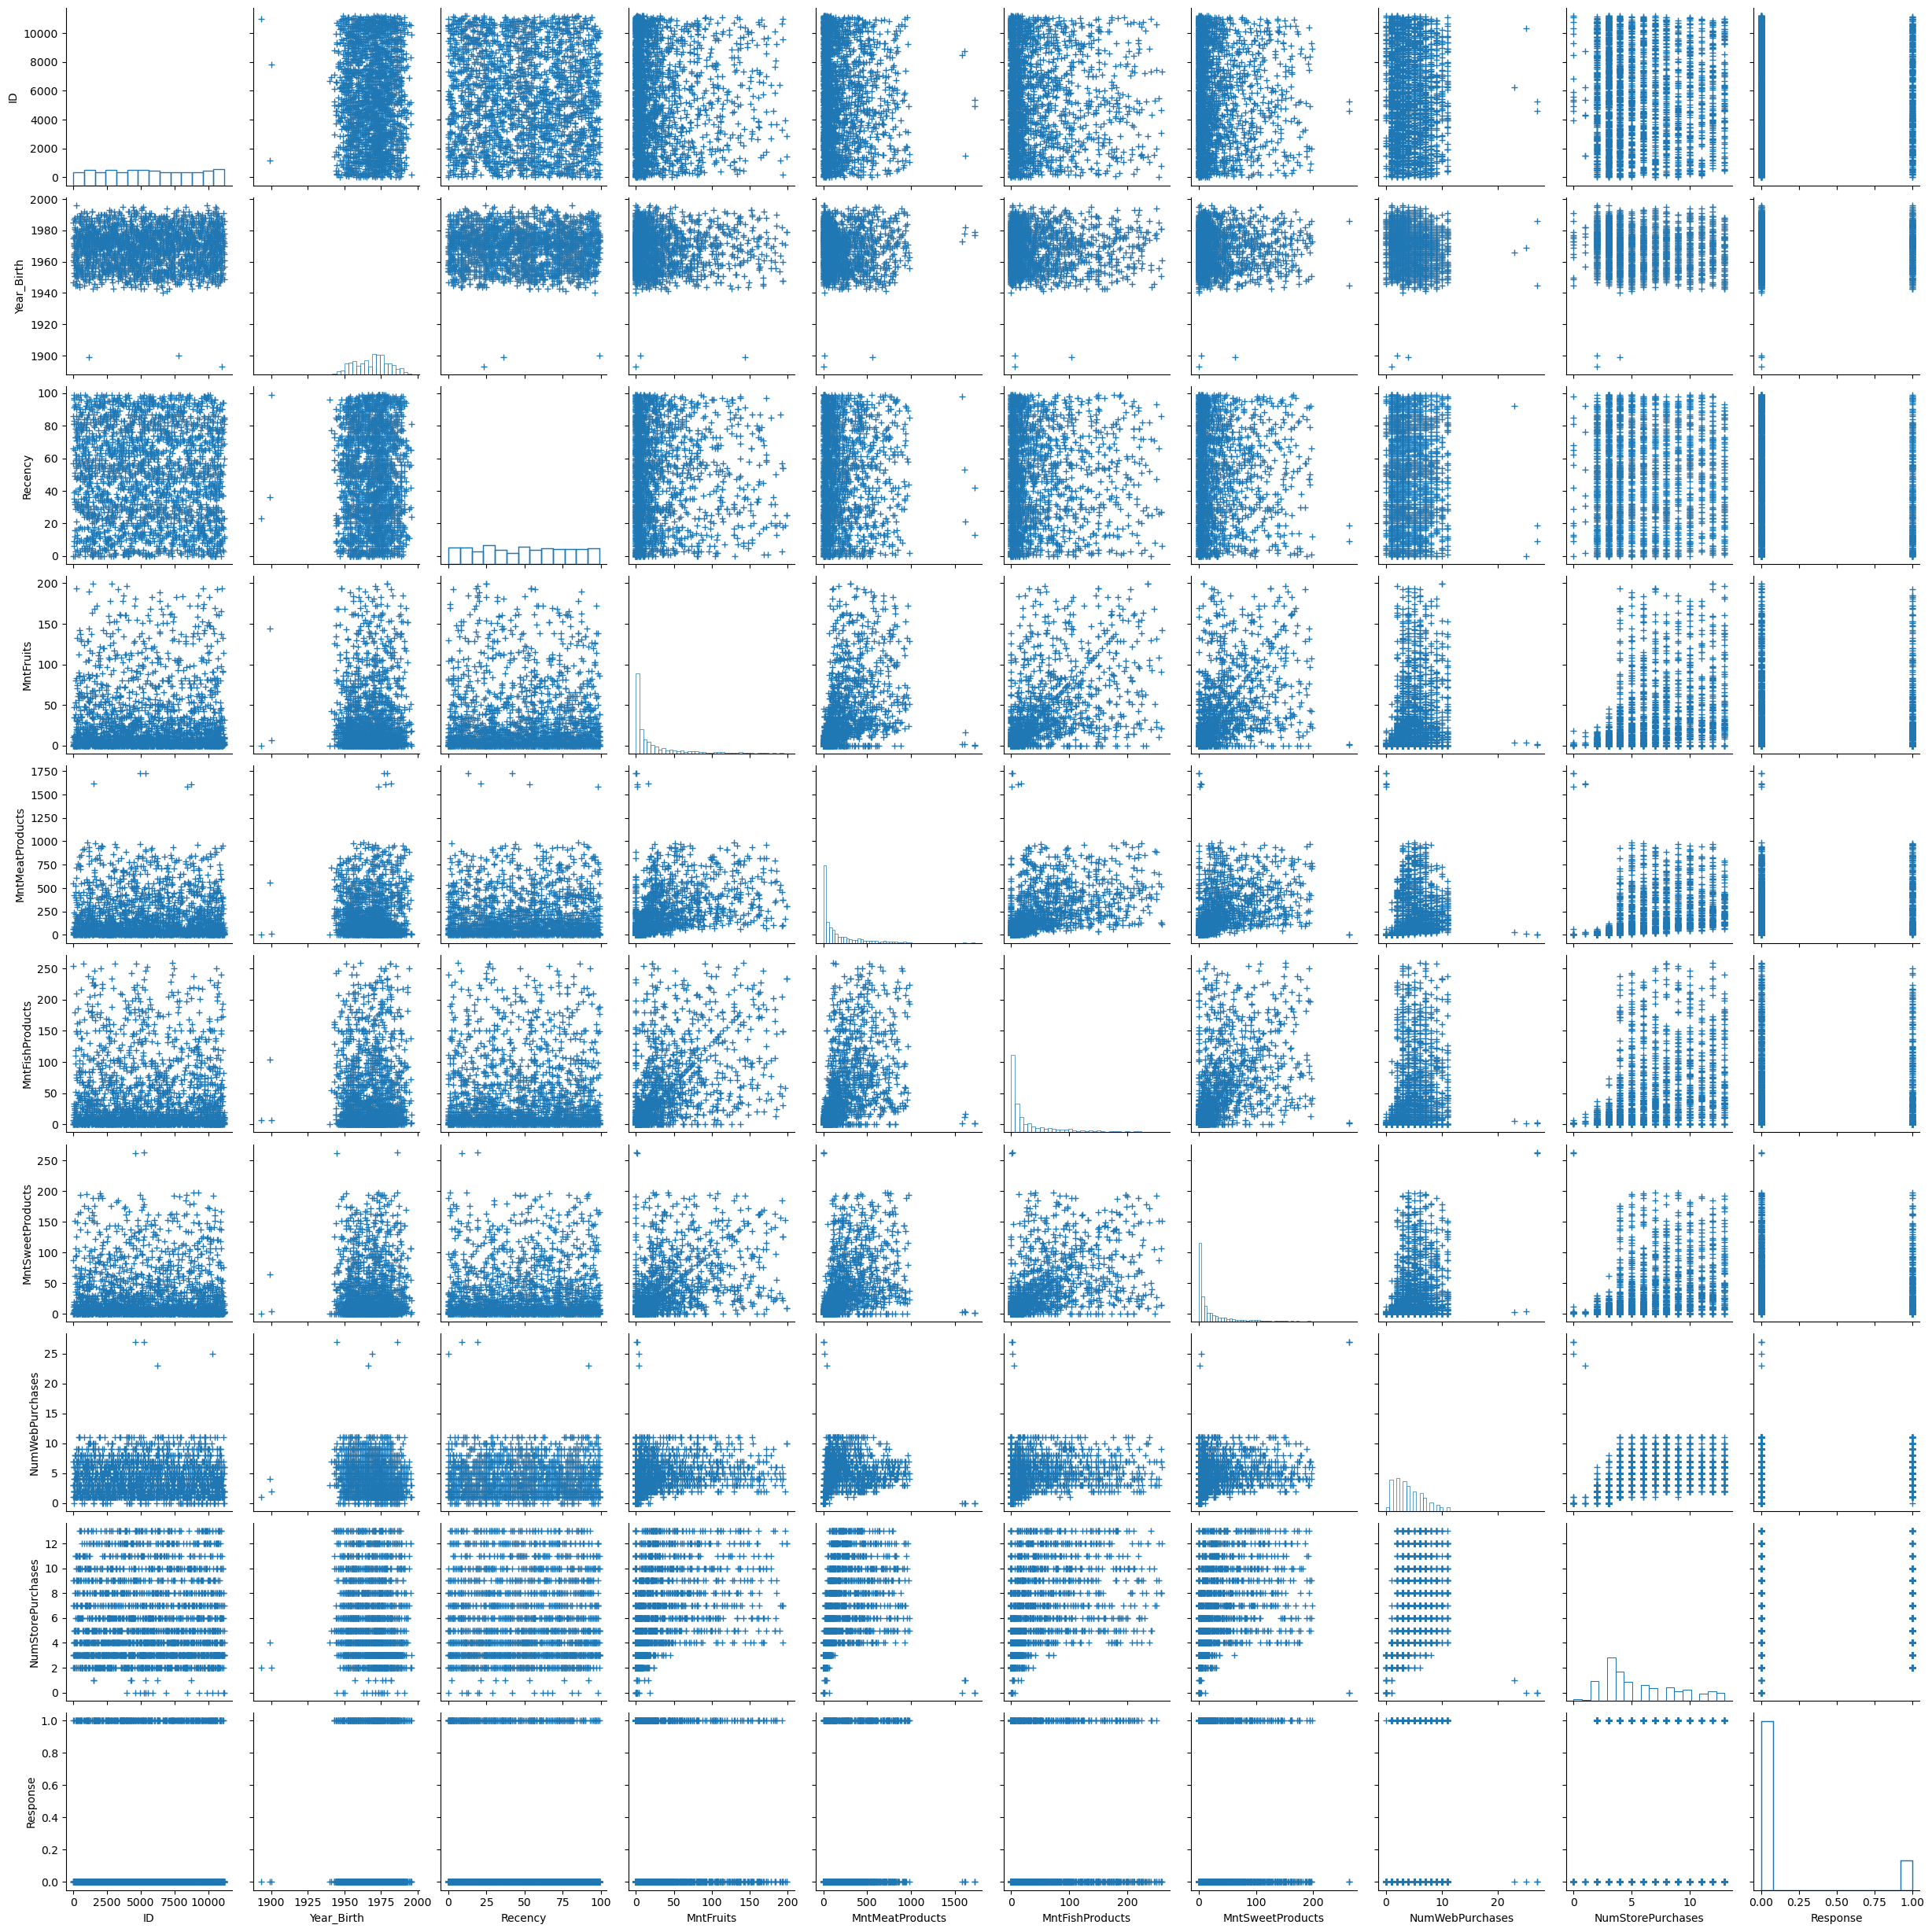

In [20]:
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [85]:
important_features = df.iloc[:, 3:].columns
important_features

Index(['Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumWebPurchases', 'NumStorePurchases', 'Response'],
      dtype='object')

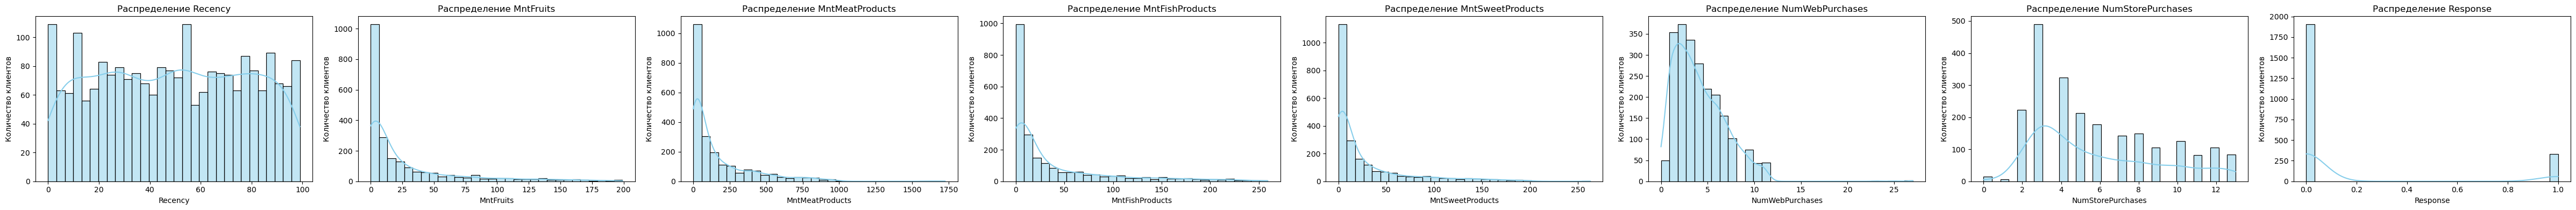

In [99]:
fig, axes = plt.subplots(1, len(important_features), figsize=(6*len(important_features), 4))

for ax, col in zip(axes, important_features):
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Количество клиентов')

for ax in axes[len(important_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

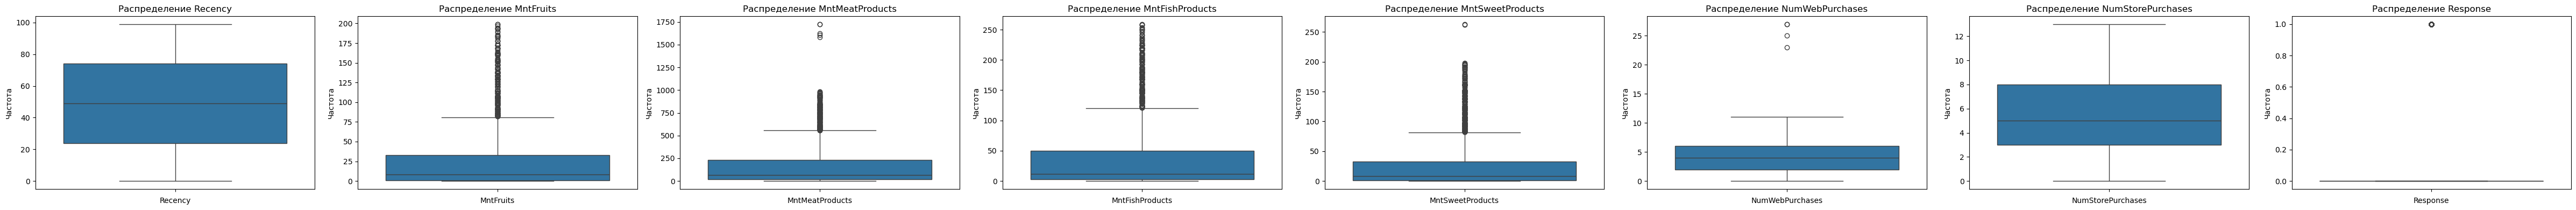

In [95]:
fig, axes = plt.subplots(1, len(important_features), figsize=(6 * len(important_features), 4))

for ax, col in zip(axes, important_features):
   sns.boxplot(df[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

Также аналитически по гистограммам можем предположить примерное число кластеров - 3. Скатеры не дают полного описания картины. Но по гист можем примерно определить. 

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

Можем предположить кол-во - 3. Определяем данное количество по бугоркам на гистах. Это минимальное кол -во кластеров, которое можно выделить

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [298]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Customer_Year'] = df['Dt_Customer'].dt.year
df['Customer_Month'] = df['Dt_Customer'].dt.month
df['Customer_Day'] = df['Dt_Customer'].dt.day

df = df.drop('Dt_Customer', axis=1) # перенес в дату, чтобы разбить на три новые фичи

In [300]:
df

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Customer_Year,Customer_Month,Customer_Day
0,5524,1957,58,88,546,172,88,8,4,1,2012,9,4
1,2174,1954,38,1,6,2,1,1,2,0,2014,3,8
2,4141,1965,26,49,127,111,21,8,10,0,2013,8,21
3,6182,1984,26,4,20,10,3,2,4,0,2014,2,10
4,5324,1981,94,43,118,46,27,5,6,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,46,43,182,42,118,9,4,0,2013,6,13
2236,4001,1946,56,0,30,0,0,8,5,0,2014,6,10
2237,7270,1981,91,48,217,32,12,2,13,0,2014,1,25
2238,8235,1956,8,30,214,80,30,6,10,0,2014,1,24


In [302]:
df.isna().sum()

ID                   0
Year_Birth           0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
Customer_Year        0
Customer_Month       0
Customer_Day         0
dtype: int64

In [304]:
df.drop("ID", axis=1)

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])

In [306]:
df_scaled

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Customer_Year,Customer_Month,Customer_Day
0,-0.020999,-0.985345,0.307039,1.551577,1.679702,2.462147,1.476500,1.409304,-0.550785,2.388846,-1.502225,0.726520,-1.324242
1,-1.053058,-1.235733,-0.383664,-0.636301,-0.713225,-0.650449,-0.631503,-1.110409,-1.166125,-0.418612,1.420036,-0.994691,-0.869113
2,-0.447070,-0.317643,-0.798086,0.570804,-0.177032,1.345274,-0.146905,1.409304,1.295237,-0.418612,-0.041094,0.439652,0.610056
3,0.181716,1.268149,-0.798086,-0.560857,-0.651187,-0.503974,-0.583043,-0.750450,-0.550785,-0.418612,1.420036,-1.281560,-0.641549
4,-0.082614,1.017761,1.550305,0.419916,-0.216914,0.155164,-0.001525,0.329427,0.064556,-0.418612,1.420036,-1.568428,0.382491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,-0.107383,0.419916,0.066692,0.081926,2.203398,1.769263,-0.550785,-0.418612,-0.041094,-0.134085,-0.300202
2236,-0.490200,-1.903435,0.237969,-0.661449,-0.606873,-0.687068,-0.655733,1.409304,-0.243114,-0.418612,1.420036,-0.134085,-0.641549
2237,0.516905,1.017761,1.446700,0.545656,0.221789,-0.101168,-0.364974,-0.750450,2.218248,-0.418612,1.420036,-1.568428,1.065185
2238,0.814199,-1.068807,-1.419719,0.092992,0.208495,0.777683,0.071165,0.689386,1.295237,-0.418612,1.420036,-1.568428,0.951402


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

In [194]:
inertias = []
silhouettes = []

K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, kmeans.labels_))

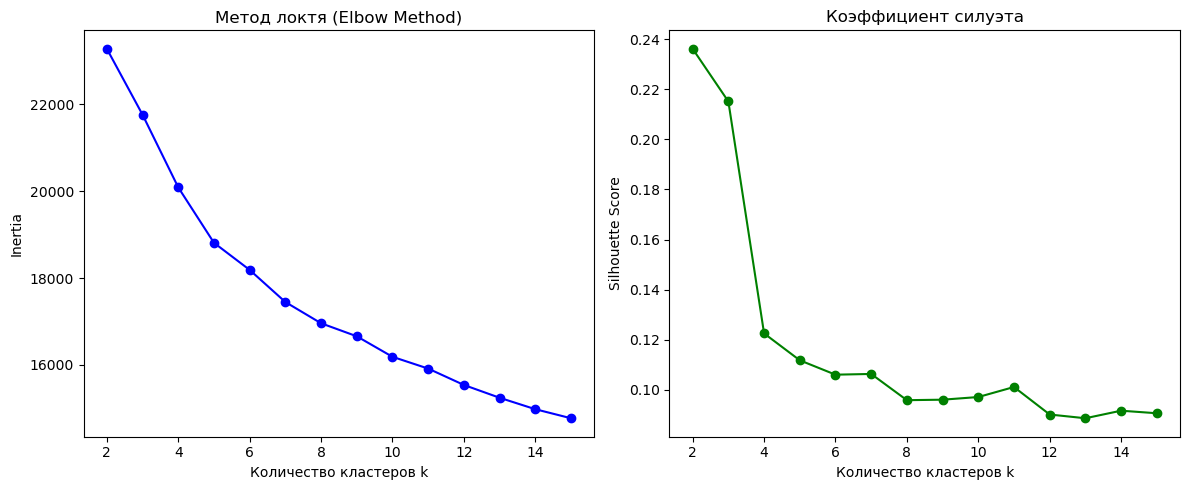

In [195]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

In [264]:
kmeans_best = KMeans(n_clusters=3, random_state=1)
kmeans_best.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [308]:
cluster = kmeans_best.labels_
df['cluster'] = cluster

In [310]:
inr_km = kmeans_best.inertia_
sil_km = silhouette_score(df_scaled, kmeans_best.labels_)
print(inr_km, sil_km)

21757.498529736946 0.2151221081428525


# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [216]:
tsne = TSNE(n_components=2, perplexity=5) # 2 копмпонента, тк снижаем до 2-х размерного пространства, perplexity рекомендуется маленькое для небольших наборов данных.
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

,0,1
0,61.180645,-37.418045
1,-20.090540,85.687996
2,48.451954,44.577972
3,-47.429974,55.743732
4,-5.948184,54.169029
...,...,...
2235,50.113426,16.629045
2236,-11.596045,24.963226
2237,6.331967,22.049294
2238,12.263410,16.667515


<Axes: xlabel='0', ylabel='1'>

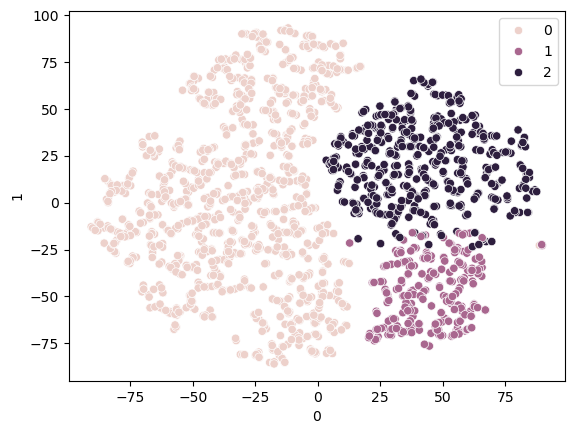

In [228]:
sns.scatterplot(x=data[0], y=data[1], hue=cluster)

# Задание 6

Постройте профили кластеров и опишите их.

In [312]:
df_g = df.groupby("cluster").agg({x: ["mean", "std", "count"] for x in important_features}).T
df_g

cluster                            0           1           2
Recency           mean     51.366868   33.875000   52.028053
                  std      28.560003   27.010545   28.442040
                  count  1322.000000  312.000000  606.000000
MntFruits         mean      6.925870   31.423077   65.935644
                  std      10.144778   40.001373   48.988420
                  count  1322.000000  312.000000  606.000000
MntMeatProducts   mean     47.445537  284.657051  367.049505
                  std      73.409167  314.225431  218.099903
                  count  1322.000000  312.000000  606.000000
MntFishProducts   mean     10.252648   43.605769   93.891089
                  std      15.414476   56.134729   63.868056
                  count  1322.000000  312.000000  606.000000
MntSweetProducts  mean      6.817700   30.951923   69.226073
                  std       9.786327   38.427209   51.519234
                  count  1322.000000  312.000000  606.000000
NumWebPurchases   mean      3.081694    4.990385    5.806931
                  std       2.349993    2.859503    2.592555
                  count  1322.000000  312.000000  606.000000
NumStorePurchases mean      4.263994    5.746795    9.141914
                  std       2.195734    3.029860    2.742923
                  count  1322.000000  312.000000  606.000000
Response          mean      0.000000    0.983974    0.044554
                  std       0.000000    0.125776    0.206494
                  count  1322.000000  312.000000  606.000000

In [332]:
functions = ["mean", "std", "count"]

stat = np.array([[df[feature].apply(f) for f in functions] for feature in important_features]).flatten()

df_busy = df_g.copy()
df_busy["Global"] = stat
df_busy

cluster                            0           1           2       Global
Recency           mean     51.366868   33.875000   52.028053    49.109375
                  std      28.560003   27.010545   28.442040    28.962453
                  count  1322.000000  312.000000  606.000000  2240.000000
MntFruits         mean      6.925870   31.423077   65.935644    26.302232
                  std      10.144778   40.001373   48.988420    39.773434
                  count  1322.000000  312.000000  606.000000  2240.000000
MntMeatProducts   mean     47.445537  284.657051  367.049505   166.950000
                  std      73.409167  314.225431  218.099903   225.715373
                  count  1322.000000  312.000000  606.000000  2240.000000
MntFishProducts   mean     10.252648   43.605769   93.891089    37.525446
                  std      15.414476   56.134729   63.868056    54.628979
                  count  1322.000000  312.000000  606.000000  2240.000000
MntSweetProducts  mean      6.817700   30.951923   69.226073    27.062946
                  std       9.786327   38.427209   51.519234    41.280498
                  count  1322.000000  312.000000  606.000000  2240.000000
NumWebPurchases   mean      3.081694    4.990385    5.806931     4.084821
                  std       2.349993    2.859503    2.592555     2.778714
                  count  1322.000000  312.000000  606.000000  2240.000000
NumStorePurchases mean      4.263994    5.746795    9.141914     5.790179
                  std       2.195734    3.029860    2.742923     3.250958
                  count  1322.000000  312.000000  606.000000  2240.000000
Response          mean      0.000000    0.983974    0.044554     0.149107
                  std       0.000000    0.125776    0.206494     0.356274
                  count  1322.000000  312.000000  606.000000  2240.000000

In [342]:
cluster_labels = [0, 1, 2]

df_brel = df_busy.copy()

for label in cluster_labels:
    df_brel[label] = 100 * df_brel[label] / df_brel["Global"] - 100

df_brel

cluster                           0           1           2       Global
Recency           mean     4.596868  -31.021317    5.943219    49.109375
                  std     -1.389556   -6.739443   -1.796854    28.962453
                  count  -40.982143  -86.071429  -72.946429  2240.000000
MntFruits         mean   -73.668129   19.469240  150.684593    26.302232
                  std    -74.493582    0.573093   23.168696    39.773434
                  count  -40.982143  -86.071429  -72.946429  2240.000000
MntMeatProducts   mean   -71.580990   70.504373  119.855948   166.950000
                  std    -67.477108   39.213128   -3.373926   225.715373
                  count  -40.982143  -86.071429  -72.946429  2240.000000
MntFishProducts   mean   -72.678146   16.203199  150.206455    37.525446
                  std    -71.783335    2.756319   16.912410    54.628979
                  count  -40.982143  -86.071429  -72.946429  2240.000000
MntSweetProducts  mean   -74.807989   14.370115  155.796511    27.062946
                  std    -76.293099   -6.911954   24.802838    41.280498
                  count  -40.982143  -86.071429  -72.946429  2240.000000
NumWebPurchases   mean   -24.557427   22.168979   42.158740     4.084821
                  std    -15.428772    2.907411   -6.699479     2.778714
                  count  -40.982143  -86.071429  -72.946429  2240.000000
NumStorePurchases mean   -26.358162   -0.749264   57.886567     5.790179
                  std    -32.458878   -6.801003  -15.627231     3.250958
                  count  -40.982143  -86.071429  -72.946429  2240.000000
Response          mean  -100.000000  559.910947  -70.119168     0.149107
                  std   -100.000000  -64.696881  -42.040646     0.356274
                  count  -40.982143  -86.071429  -72.946429  2240.000000

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

<Axes: xlabel='cluster', ylabel='None-None'>

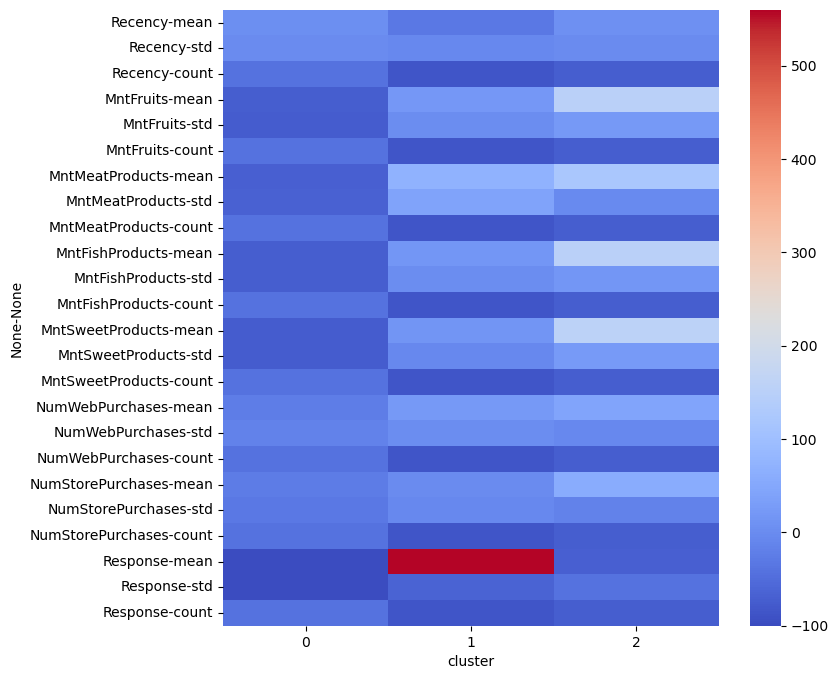

In [344]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_brel[cluster_labels], cmap="coolwarm")

## Наш первый кластер - это люди, которые бывают у нас редко, не участвуют в рекламных компаниях, и совершают меньше всего покупок. При этом, количество этих людей, больше чем два других кластера. Возможно нам стоит что то предложить данным пользователям. 
## Наш второй кластер - это люди, которые приходили к нам не так давно, они участвуют в рекламных компаниях. И кол-во покупок у них среднее между кластеров.
## Наш третий кластер - это люди, которые также ходят к нам редко, но покупают больше, у них у всех больше потрачено денег на разные виды продукции